In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the data
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [3]:
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


## Data Analysis

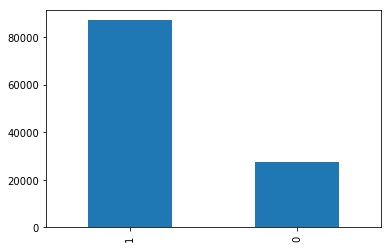

In [4]:
# target varibale 
train.target.value_counts().plot.bar()

In [5]:
# percantage of null values
float(len(train[pd.isnull(train)]))/float((train.shape[1])*train.shape[0])

0.007518796992481203

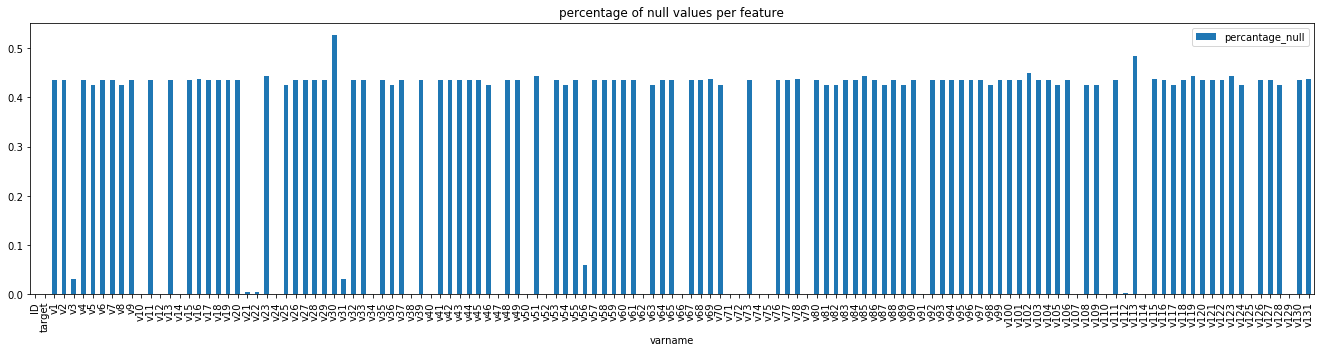

In [6]:
# null value percantages
nullvalues=[float((train[col].isnull().sum()))/len(train[col]) for col in train.columns.values]
percentagenull=list(zip(train.columns.values,nullvalues))
nullplot=pd.DataFrame(data=percentagenull,columns=["varname","percantage_null"])
nullplot=nullplot.set_index("varname")
nullplot.plot.bar(figsize =(23,5),title="percentage of null values per feature")

In [7]:
# duplicate row in train set
train.shape[0]-train.drop_duplicates().shape[0]

0

In [8]:
# constent feature count
uniquecount=[train[col].nunique() for col in train.columns.values]
uniquecount=pd.DataFrame(data=list(zip(train.columns.values,uniquecount)),columns=["var","unique_count"])
unique_count=uniquecount[uniquecount.unique_count==1]

print("constent features count = {} ".format(unique_count.shape[0]))
uniquecount.head()

constent features count = 0 


,var,unique_count
0,ID,114321
1,target,2
2,v1,64487
3,v2,64524
4,v3,3


In [9]:
# seprating numeric and charcter features
train_numr =train.select_dtypes(include=[np.number])
train_char =train.select_dtypes(include=[np.object])
print("Numerical column count : {}".format(train_numr.shape[1]))
print("Character column count : {}".format(train_char.shape[1]))

Numerical column count : 114
Character column count : 19


In [10]:
# looking at charcter features
for col in  train_char:
    print(col + " : "  + str(train_char[col].unique()[:10]))

v3 : ['C' nan 'A' 'B']
v22 : ['XDX' 'GUV' 'FQ' 'ACUE' 'HIT' 'AYX' 'NFD' 'AHBW' 'GKQ' 'PYF']
v24 : ['C' 'E' 'D' 'A' 'B']
v30 : ['C' nan 'G' 'D' 'B' 'F' 'A' 'E']
v31 : ['A' 'B' nan 'C']
v47 : ['C' 'E' 'I' 'D' 'F' 'G' 'J' 'B' 'A' 'H']
v52 : ['G' 'F' 'H' 'K' 'A' 'C' 'E' 'J' 'D' 'I']
v56 : ['DI' 'DY' 'AS' 'BW' nan 'DX' 'DP' 'AF' 'CY' 'AW']
v66 : ['C' 'A' 'B']
v71 : ['F' 'B' 'C' 'L' 'I' 'A' 'G' 'K' 'D']
v74 : ['B' 'C' 'A']
v75 : ['D' 'B' 'C' 'A']
v79 : ['E' 'D' 'B' 'C' 'I' 'P' 'A' 'O' 'K' 'M']
v91 : ['A' 'B' 'G' 'C' 'F' 'E' 'D' nan]
v107 : ['E' 'B' 'C' 'D' 'A' 'F' 'G' nan]
v110 : ['B' 'A' 'C']
v112 : ['O' 'U' 'S' 'J' 'T' 'D' 'I' 'F' 'L' 'M']
v113 : [nan 'G' 'X' 'M' 'P' 'S' 'I' 'AC' 'W' 'L']
v125 : ['AU' 'AF' 'AE' 'CJ' 'Z' 'X' 'BJ' 'BY' 'S' 'E']


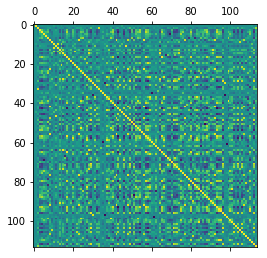

In [11]:
train_numr_df = train_numr.loc[np.random.choice(train_numr.index, 25000, replace=False)]
plt.matshow(train_numr_df.corr())

In [12]:
# function to convert to hexavigesimal base
def az_to_int(az,nanVal=None):
    if az==az:  #catch NaN
        hv = 0
        for i in range(len(az)):
            hv += (ord(az[i].lower())-ord('a')+1)*26**(len(az)-1-i)
        return hv
    else:
        if nanVal is not None:
            return nanVal
        else:
            return az

In [13]:
# combine the data
test_df = test.copy()
test_df['target'] = -999
all_data = train.append(test_df)

# convert v22 to hexavigesimal
all_data.v22 = all_data.v22.apply(az_to_int)
for c in all_data.columns.values:
    if all_data[c].dtype=='object':
        all_data[c], tmpItter = all_data[c].factorize()

# replace all NA's with -1
all_data.fillna(-1, inplace=True)

# split the data
train_df = all_data[all_data['target']>-999]
test_df = all_data[all_data['target']==-999]
test_df = test_df.drop(['target'],axis=1)

In [14]:
#plt.rcParams['figure.max_open_warning']=300
#nbins=20

#featureNames = train_df.columns.values
#featureNames = np.delete(featureNames, 0)
#for c in  featureNames:
#    if train_df[c].dtype != 'object' and c != 'target':
#        if c=='v22':
#            hbins = 100
#        else:
#            hbins = nbins
#        fig=plt.figure(figsize=(14,4))
#        ax1 = fig.add_subplot(1,2,1) 
        
#        dataset1 = train_df[c][~np.isnan(train_df[c])]
#        dataset2 = train_df[c][~np.isnan(train_df[c]) & train_df.target]
        
#        # left plot
#        hd = ax1.hist((dataset1, dataset2), bins=hbins, histtype='bar',normed=True,
#                        color=["blue", "red"],label=['all','target=1'])
#        ax1.set_xlabel('Feature: '+c)
#        ax1.set_xlim((-1,max(train_df[c])))
        
#        binwidth = hd[1][1]-hd[1][0]
#        midpts = (hd[1][:-1]+hd[1][1:])/2
#        cdf_all= np.cumsum(hd[0][0])*binwidth
#        cdf_ones = np.cumsum(hd[0][1])*binwidth

#        # right plot
#        ax2 = fig.add_subplot(1,2,2) 
#        ax2.set_ylim((0,1))
#        ax2.set_xlim((0,nbins))
#        ax2.plot(midpts,cdf_all,color='b')
#        ax2.plot(midpts,cdf_ones,color='r')
#        ax2.plot(midpts,0.5+10*(cdf_all-cdf_ones),color='k')
#        ax2.grid()
#        ax2.set_xlim((-1,max(train_df[c])))
#        ax2.set_xlabel('cdfs plus cdf_diff*10+0.5')
#        ax2.axhline(0.5,color='gray',linestyle='--')

Histogram plots on the the left:

- Blue: All of the train data (normalized)
- Red: Train Data where the target variable is one (again normalized)
- Na's are -1, so the first column is usually large

CDF Plots on the right:

- Blue and red as before
- Black line is the difference in the CDF's (x10 + 0.5 for visualization)

A few interesting insights:

- It's easy to see why v50 is such a powerful predictor
- Somewhat counterintuitive, most of the features have more NA's when the target is true. This is indicated both by the first red bar on the left being higher than the blue and by the cdf difference line being negative at the start. Perhaps it's the presence of certain information, not the lack of it, that prevents fast-track processing.
- With v22 coded in hexavigesimal, there is some large scale structure in the pdf, and possibly some structure in the CDF difference plot

## Model Building

In [15]:
import xgboost as xgb
from sklearn.feature_extraction import DictVectorizer as DV

In [16]:
train.drop(['v22'], axis=1, inplace=True)
train.drop(['v91'], axis=1, inplace=True)
test.drop(['v22'], axis=1, inplace=True)
test.drop(['v91'], axis=1, inplace=True)

In [17]:
def impute_most_freq_value(df,colname):
    c = df[colname].value_counts()
    return c.index[0]

In [18]:
cat_cols_df = train.select_dtypes(include=[np.object])
cat_cols = cat_cols_df.columns

nas = {}
for colname in cat_cols:
    nas[colname] = impute_most_freq_value(train,colname)

for colname in cat_cols:
    train[colname].fillna(nas[colname],inplace=True)

for colname in cat_cols:
    test[colname].fillna(nas[colname],inplace=True)

cat_train = train[cat_cols]
cat_test = test[cat_cols]

In [19]:
# put the numerical as matrix
train.drop(cat_cols, axis=1, inplace=True)
test.drop(cat_cols, axis=1, inplace=True)
print(cat_train.describe())

            v3     v24     v30     v31     v47     v52     v56     v66  \
count   114321  114321  114321  114321  114321  114321  114321  114321   
unique       3       5       7       3      10      12     122       3   
top          C       E       C       A       C       J      BW       A   
freq    114041   55177   92288   91804   55425   11106   18233   70353   

           v71     v74     v75     v79    v107    v110    v112    v113    v125  
count   114321  114321  114321  114321  114321  114321  114321  114321  114321  
unique       9       3       4      18       7       3      22      36      90  
top          F       B       D       C       E       A       F       G      BM  
freq     75094  113560   75087   34561   27082   55688   22053   71556    5836  


In [20]:
# transform the categorical to dict
dict_train_data = cat_train.T.to_dict().values()
dict_test_data = cat_test.T.to_dict().values()

In [21]:
# vectorize
vectorizer = DV(sparse = False)

features = vectorizer.fit_transform(dict_train_data)
vec_data = pd.DataFrame(features)
vec_data.columns = vectorizer.get_feature_names()
#vec_data.rename(columns={'changed': 'vec_changed'}, inplace=True)
#vec_data.rename(columns={'id': 'vec_id'}, inplace=True)
vec_data.index = train.index
train = train.join(vec_data)

features = vectorizer.transform(dict_test_data)
vec_data = pd.DataFrame(features)
vec_data.columns = vectorizer.get_feature_names()
vec_data.index = test.index
test = test.join(vec_data)

In [22]:
# merge numerical and categorical sets
trainend = int(0.75*len(train))
valid_inds = list(train[trainend:].index.values)
train_inds = list(train.loc[~train.index.isin(valid_inds)].index.values)

In [23]:
# fill in nan with mean
train.fillna(train.mean(),inplace=True);
test.fillna(test.mean(),inplace=True);

### 1. XGBoost

In [24]:
valid = train.iloc[valid_inds]
train = train.iloc[train_inds]

y_train = train['target'].values
y_valid = valid['target'].values

In [25]:
X_train = train.drop(['ID','target'],axis=1).values
X_valid = valid.drop(['ID','target'],axis=1).values

ids = test['ID'].values
X_test = test.drop(['ID'],axis=1).values

In [26]:
num_rounds=1000

params = {}
params["objective"] = "binary:logistic"
params["eta"] = 0.05
#params["min_child_weight"] = 3
params["subsample"] = 0.67
params["colsample_bytree"] = 0.9
params["silent"] = 1
params["max_depth"] = 6
params["eval_metric"] = "logloss"
params["n_estimators"] = 100

In [27]:
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_val = xgb.DMatrix(X_valid, label=y_valid)
xgb_test = xgb.DMatrix(X_test)

param_list = list(params.items())
watch_list = [(xgb_train, 'train'),(xgb_val, 'val')]

In [28]:
# train model
model = xgb.train(param_list, xgb_train, num_rounds, watch_list, verbose_eval=50, early_stopping_rounds=50)

[0]	train-logloss:0.674603	val-logloss:0.674832
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 50 rounds.
[50]	train-logloss:0.465984	val-logloss:0.474749
[100]	train-logloss:0.449869	val-logloss:0.467994
[150]	train-logloss:0.440594	val-logloss:0.466635
[200]	train-logloss:0.432266	val-logloss:0.4658
[250]	train-logloss:0.424598	val-logloss:0.465445
[300]	train-logloss:0.417141	val-logloss:0.465252
[350]	train-logloss:0.410112	val-logloss:0.465189
[400]	train-logloss:0.403469	val-logloss:0.465087
[450]	train-logloss:0.396728	val-logloss:0.465001
Stopping. Best iteration:
[433]	train-logloss:0.399045	val-logloss:0.46497



In [29]:
y_pred = model.predict(xgb_test)
y_pred[:5]

array([ 0.2285651 ,  0.91349894,  0.6243645 ,  0.57253551,  0.67902946], dtype=float32)

### 2. Feature Experiments

In [30]:
X_train = train.drop(['ID','target'],axis=1)
X_valid = valid.drop(['ID','target'],axis=1)

ids = test['ID']
X_test = test.drop(['ID'],axis=1)

In [31]:
model = xgb.XGBRegressor(max_depth=4,learning_rate=0.005,n_estimators=433,
                         subsample=0.95, objective='reg:linear')
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.005, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=433,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.95)

In [32]:
feat_names = X_train.columns.values
feat_imp = model.feature_importances_

imp_map = pd.Series(feat_imp,index=feat_names)
imp_map.sort_values(ascending=False,inplace=True)

top10 = pd.Series(imp_map[0:10]).reset_index()
top10.columns = ['Variable','Importance']

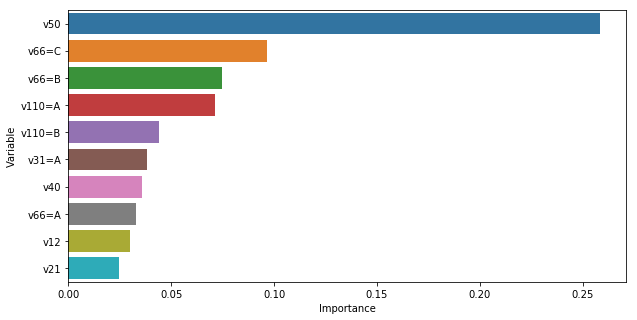

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(top10['Importance'],top10['Variable'])
plt.xlabel('Importance')